In [13]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np
from scipy import sparse
import torch
import import_ipynb

In [14]:
def mediapipe(path): 
    image=cv2.imread(path)
    image=cv2.resize(image,(600,600))
    annoted_image=image.astype(np.uint8)

    mp_face_mesh=mp.solutions.face_mesh
    connection_tesselation=mp_face_mesh.FACEMESH_TESSELATION
    # print("edges_mediapipe=",len(connection_tesselation),connection_tesselation)
    # print(mp_face_mesh)
    with mp_face_mesh.FaceMesh(static_image_mode=False,max_num_faces=2,refine_landmarks=True,min_detection_confidence=0.5) as face_mesh:
        results=face_mesh.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    print("result=", len(results.multi_face_landmarks[0].landmark), results.multi_face_landmarks[0].landmark)
    x_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
    y_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
    z_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
    i=0

    for nodes in results.multi_face_landmarks[0].landmark:
        x_axis[i]=(results.multi_face_landmarks[0].landmark[i].x)
        y_axis[i]=(results.multi_face_landmarks[0].landmark[i].y)
        z_axis[i]=(results.multi_face_landmarks[0].landmark[i].z)
        i=i+1
    # print(x_axis)

    FEATURE_MATRIX=np.zeros((468,468))
    for i in range(468):
        FEATURE_MATRIX[i][i]=1

    WEIGHTED_ADJACENCY_MATRIX=np.zeros((468,468)) #creating a numpy array of shape 468X468 initialized with zero
    BINARY_ADJACENCY_MATRIX=np.zeros((468,468))
    # print("",connection_tesselation)
    for edge in connection_tesselation:
        # Determining X & Y axis of Two Connected Points
        x1=x_axis[edge[0]]
        y1=y_axis[edge[0]]
        z1=z_axis[edge[0]]
        x2=x_axis[edge[1]]
        y2=y_axis[edge[1]]
        z2=z_axis[edge[1]]
        # Calculating Eucleadin Distance for Weighted Graph
        eucleadian_distance=(((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2 ) ** 0.5)
        # Creating Weighted Graph
        WEIGHTED_ADJACENCY_MATRIX[edge[0]][edge[1]]=eucleadian_distance
        WEIGHTED_ADJACENCY_MATRIX[edge[1]][edge[0]]=eucleadian_distance

        BINARY_ADJACENCY_MATRIX[edge[0]][edge[1]]=1
        BINARY_ADJACENCY_MATRIX[edge[1]][edge[0]]=1
        # Normalizing axis Values For Visualizing Meash on Face
        shape = image.shape 
        relative_x = int(x1 * shape[1])
        relative_y = int(y1 * shape[0])
        relative_z = int(x2 * shape[1])
        relative_c = int(y2 * shape[0])
        # Drawing Nodes and Edges on Image For Visualization
        cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3) 
        cv2.line(image,(relative_x,relative_y),(relative_z,relative_c),(0,255,0),1)

    plt.imshow(image)
    WEIGHTED_ADJACENCY_MATRIX=sparse.csr_matrix(WEIGHTED_ADJACENCY_MATRIX)
    BINARY_ADJACENCY_MATRIX=sparse.csr_matrix(BINARY_ADJACENCY_MATRIX)
    FEATURE_MATRIX=torch.from_numpy(FEATURE_MATRIX)
    DOTPRODUCT=WEIGHTED_ADJACENCY_MATRIX.dot(BINARY_ADJACENCY_MATRIX)
    return(WEIGHTED_ADJACENCY_MATRIX,FEATURE_MATRIX)


Checking mediapipe is running currectly or not

result= 478
  (0, 11)	0.004561979999562326
  (0, 37)	0.01906373736893014
  (0, 164)	0.01527025012030107
  (0, 267)	0.018677671345492693
  (1, 4)	0.013574062046567673
  (1, 19)	0.009695139607665841
  (1, 44)	0.012447378544342668
  (1, 274)	0.012305785648481057
  (2, 94)	0.010629594491692844
  (2, 97)	0.01981059279616234
  (2, 141)	0.011529884195258324
  (2, 164)	0.009302303160938162
  (2, 167)	0.022517825938342735
  (2, 326)	0.019626301313539804
  (2, 370)	0.011476761026085079
  (2, 393)	0.022900188806906335
  (3, 51)	0.018624379151696627
  (3, 195)	0.013216864770365148
  (3, 196)	0.015965068367398003
  (3, 197)	0.019763119820503355
  (3, 236)	0.016071034708157298
  (4, 1)	0.013574062046567673
  (4, 5)	0.01721802565707775
  (4, 44)	0.018332602362162217
  (4, 45)	0.014090313370837191
  :	:
  (463, 414)	0.00850691192112643
  (463, 464)	0.01162991413222807
  (464, 341)	0.014336044430646714
  (464, 413)	0.01065557630161869
  (464, 417)	0.024088018922471813
  (464, 453)	0.009613206315622472


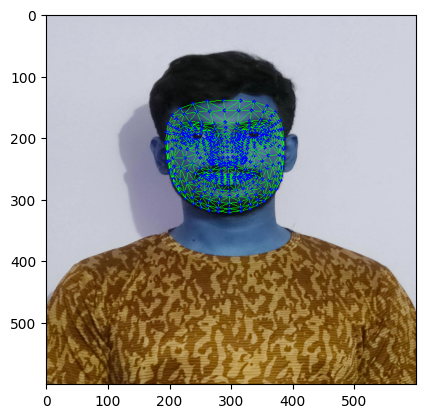

In [15]:
path="ram.jpg"
adj1,features1=mediapipe(path)
print(adj1)

result= 478


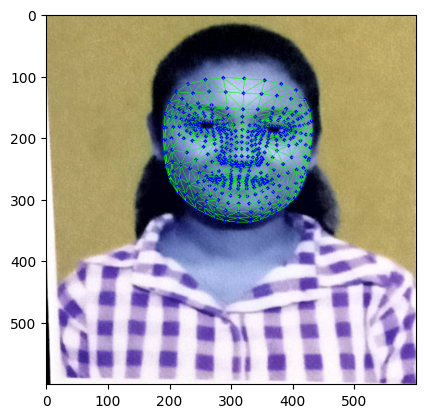

In [16]:
path="rashmi_pic.jpg"
adj1,features1=mediapipe(path)

In [17]:
# adj1=adj1.toarray()
# adj2=adj2.toarray()

In [18]:
# from scipy import spatial
# # z1=z1.detach().numpy()
# # z2=z2.detach().numpy()
# from scipy.stats.stats import pearsonr  
# # cosine_dist=[]
# val1=1 - spatial.distance.cosine(np.array(adj1).flatten() ,np.array(adj2).flatten())
# print("cosine_dist,",(1 - spatial.distance.cosine(np.array(adj1).flatten() ,np.array(adj2).flatten())))
# print("pearson_dist",(pearsonr(np.array(adj1).flatten() ,np.array(adj2).flatten())[0]))
# print("c_dist",(pearsonr(np.array(adj1).flatten() ,np.array(adj2).flatten())[0]))